In [1]:
import pandas

In [47]:
def get_signal(subject_id, run, mask):
    subject_id = '%02d' % int(subject_id)
    run = '%02d' % int(run)    
    run0 = int(run) - 1
    
    signal = np.loadtxt('/home/gdholla1/projects/bias/data/derivatives/extracted_signal/highpassed_motion/_mask_{mask}_subject_id_{subject_id}/_extracter_highpassed_motion{run0}/sub-{subject_id}_task-randomdotmotion_run-{run}_bold_unwarped_st_dtype_mcf_mask_gms_tempfilt_regfilt_maths_ts.txt'.format(**locals()))
    
    signal = (signal / signal.mean()) * 100
    signal -= signal.mean()
    
    return signal

def get_onsets(subject_id, run, design='model0', shift=0):

    df = pandas.read_pickle('/home/gdholla1/projects/bias/data/behavior/behavior.pandas')
    df = df[(df.subj_idx == subject_id) & (df.block == run)]

    df['onset_cue'] += shift
    df['onset_stim'] += shift
    
    
    if design == 'model0':
        onsets_cue = df.onset_cue.tolist()
        onsets_stim = df.onset_stim.tolist()

        conditions=['onsets_cue',
                    'onsets_stim',]
        
        onsets=[onsets_cue,
                onsets_stim]
        
    elif design == 'model1a':
        conditions=['payoff cue',
                    'neutral cue',
                    'easy',
                    'hard']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[df.difficulty == 'easy'].onset_stim.tolist(),
                df[df.difficulty == 'hard'].onset_stim.tolist()]
        
    elif design == 'model1b':
        conditions= ['left', 'right', 'neutral', 'easy', 'hard']
        
        onsets=[df[df.cue == 'left'].onset_cue.tolist(),
                df[df.cue == 'right'].onset_cue.tolist(),                
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[df.difficulty == 'easy'].onset_stim.tolist(),
                df[df.difficulty == 'hard'].onset_stim.tolist()]        
        
        
    elif design == 'model1c':
        conditions=['payoff_cue',
                    'neutral_cue',
                    'easy (correct)',
                    'hard (correct)',
                    'easy (error)',
                    'hard (error)']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[(df.difficulty == 'easy') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.difficulty == 'hard') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.difficulty == 'easy') & (df.correct == 0)].onset_stim.tolist(),
                df[(df.difficulty == 'hard') & (df.correct == 0)].onset_stim.tolist()]        
        
    elif design == 'model1d':
        conditions=['payoff_cue',
                    'neutral_cue',
                    'easy',
                    'hard',
                    'correct',
                    'error']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[(df.difficulty == 'easy')].onset_stim.tolist(),
                df[(df.difficulty == 'hard')].onset_stim.tolist(),
                df[(df.correct == 1)].onset_stim.tolist(),
                df[(df.correct == 0)].onset_stim.tolist()]
        
    
    elif design == 'model2':
        conditions=['payoff_cue',
                    'neutral_cue',
                    'correct (congruent)',
                    'correct (neutral)',
                    'correct (incongruent)',
                    'error (congruent)',
                    'error (neutral)',
                    'error (incongruent)']   
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[(df.cue_validity == 'valid') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.cue_validity == 'neutral') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.cue_validity == 'invalid') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.cue_validity == 'valid') & (df.correct == 0)].onset_stim.tolist(),
                df[(df.cue_validity == 'neutral') & (df.correct == 0)].onset_stim.tolist(),
                df[(df.cue_validity == 'invalid') & (df.correct == 0)].onset_stim.tolist()]
        
        
    elif design == 'model3':
        conditions=['payoff_cue',
                    'neutral_cue',                    
                    'left response',
                    'right response']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[df.response == 1].onset_stim.tolist(),
                df[df.response == 2].onset_stim.tolist()]        
        
        
    elif design == 'model4':
        
        onsets_neutral_cue_correct = df[(df.cue_validity == 'neutral') & (df.correct == 1)].onset_stim.tolist()
        onsets_neutral_cue_error = df[(df.cue_validity == 'neutral') & (df.correct == 0)].onset_stim.tolist()
        
        onsets_valid_cue_correct = df[(df.cue_validity == 'valid') & (df.correct == 1)].onset_stim.tolist()
        onsets_valid_cue_error = df[(df.cue_validity == 'valid') & (df.correct == 0)].onset_stim.tolist()        
        
        onsets_invalid_cue_correct = df[(df.cue_validity == 'invalid') & (df.correct == 1)].onset_stim.tolist()
        onsets_invalid_cue_error = df[(df.cue_validity == 'invalid') & (df.correct == 0)].onset_stim.tolist()                

        
        conditions=['payoff_cue',
                    'neutral_cue',
                    'valid (correct)',
                    'valid (error)',
                    'neutral (correct)',
                    'neutral (error)',
                    'invalid (correct)',
                    'invalid (error)']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                onsets_valid_cue_correct,
                onsets_valid_cue_error,
                onsets_neutral_cue_correct,
                onsets_neutral_cue_error,
                onsets_invalid_cue_correct,
                onsets_invalid_cue_error]    
        
        
    elif design == 'model5':
        conditions=['payoff cue',
                    'neutral cue',]

        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),]


    elif design == 'model6':
        conditions=['easy rdm',
                    'hard rdm',]

        onsets=[df[df.difficulty == 'easy'].onset_stim.tolist(),
                df[df.difficulty == 'hard'].onset_stim.tolist(),]
     
    
    return dict(zip(conditions, onsets))

In [3]:
%load_ext rpy2.ipython


# Model 1a

In [23]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model1a', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R_C/all the input arrays must have same number of dimensions


The first set of analyses tested whether there were significant differences in the BOLD response between task conditions. Therefore, a set of general linear models (GLM) were fit to the extracted STN segment time series. The first model (GLM1a) contained the following task condition regressors: (a) neutral cue, (b) payoff cue, (c) easy RDM stimulus, (d) hard RDM stimulus. Its first main contrast of interest was ‘payoff cue > neutral cue’ (and neutral cue > payoff cue), to see whether any segments were involved in processing the cue information. The other main contrast was ‘hard RDM stimulus > easy RDM stimulus’ (and ‘easy RDM stimulus > hard RDM stimulus’), which should indicate areas that were related to the speed of evidence accumulation. 


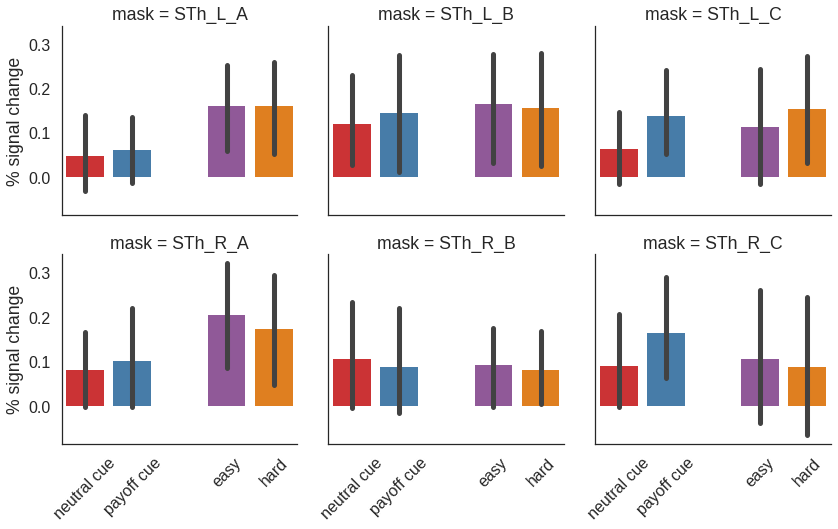

In [24]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
fac = sns.factorplot(x='par', y='% signal change', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, x_order=['neutral cue', 'payoff cue', '', 'easy', 'hard',])

fac.set_xticklabels(rotation=45)

plt.tight_layout()

fac.set_xlabels('')

plt.savefig('/home/gdholla1/projects/bias/reports/figures/glm_model1a.pdf')

### Payoff cue > neutral cue

In [25]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    
    print '***** %s ******' % mask
    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$payoff.cue - df_mask$neutral.cue)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_rel(df_mask['payoff cue'], df_mask['neutral cue'])
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                    't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 't', 'p']], 2).T

***** STh_L_A ******
***** STh_L_B ******
***** STh_L_C ******
***** STh_R_A ******
***** STh_R_B ******
***** STh_R_C ******


,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,0.26,0.28,1.68,0.26,0.27,2.73
t,0.46,0.6,2.21,0.42,-0.55,2.51
p,0.65,0.56,0.04,0.68,0.59,0.02


In [26]:
tmp = df_glm.pivot_table(index='subject_id', values='value', columns=['par', 'mask'])
tmp = tmp['payoff cue'] - tmp['neutral cue']
tmp = pandas.melt(tmp.reset_index(), id_vars=['subject_id'])

In [27]:
tmp = df_glm.pivot_table(index='subject_id', values='value', columns=['par', 'mask'])
tmp = tmp['payoff cue'] - tmp['neutral cue']
tmp = pandas.melt(tmp.reset_index(), id_vars=['subject_id'])
tmp['subject_id'] = tmp.subject_id.astype('category')

tmp_l = tmp[np.in1d(tmp['mask'], ['STh_L_A', 'STh_L_B', 'STh_L_C'])]
%R -i tmp_l
%R bf = anovaBF(value ~ mask + subject_id, data=tmp_l,  whichRandom="subject_id")
# %R bf = anovaBF(value ~ mask , data=tmp_l,  iterations=10000)
%R print(bf)
%R print(summary(aov(value ~ mask + Error(subject_id/(mask)), tmp_l)))

    
tmp_r = tmp[np.in1d(tmp['mask'], ['STh_R_A', 'STh_R_B', 'STh_R_C'])]
%R -i tmp_r
%R bf = anovaBF(value ~ mask + subject_id, data=tmp_r,  whichRandom="subject_id")
# %R bf = anovaBF(value ~ mask , data=tmp_l,  iterations=10000)
%R print(bf)
%R print(summary(aov(value ~ mask + Error(subject_id/(mask)), tmp_r)))

  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.3254724 ±0.99%

Against denominator:
  value ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS




Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18 0.8026 0.04459               

Error: subject_id:mask
          Df Sum Sq Mean Sq F value Pr(>F)
mask       2 0.0372 0.01862   1.146  0.329
Residuals 36 0.5851 0.01625               


  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 1.138723 ±0.65%

Against denominator:
  value ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS




Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18 0.8705 0.04836               

Error: subject_id:mask
          Df Sum Sq Mean Sq F value Pr(>F)  
mask       2 0.0801 0.04007   2.963 0.0644 .
Residuals 36 0.4869 0.01352                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.5434273 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.3697851 ±0.01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.4229843 ±0.01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 2.404739 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



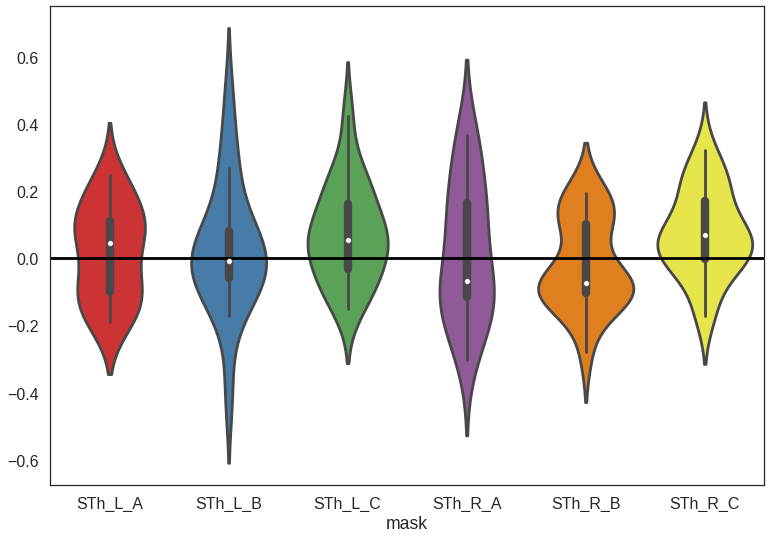

In [28]:
tmp = df_glm.pivot_table(index='subject_id', values='value', columns=['par', 'mask'])
tmp = tmp['payoff cue'] - tmp['neutral cue']

sns.violinplot(tmp)
plt.axhline(0, c='k')

%R -i tmp
%R bf = ttestBF(tmp$STh_L_A - tmp$STh_L_C)
%R print(bf)
%R bf = ttestBF(tmp$STh_L_B - tmp$STh_L_C)
%R print(bf)
%R bf = ttestBF(tmp$STh_R_A - tmp$STh_L_C)
%R print(bf)
%R bf = ttestBF(tmp$STh_R_B - tmp$STh_L_C)
%R print(bf)

# Difficulty > Easy

In [29]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    
    print '***** %s ******' % mask
    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$easy - df_mask$hard)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_rel(df_mask['easy'], df_mask['hard'])
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                     't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 'p']], 2).T

***** STh_L_A ******
***** STh_L_B ******
***** STh_L_C ******
***** STh_R_A ******
***** STh_R_B ******
***** STh_R_C ******


,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,0.24,0.25,0.36,0.49,0.26,0.25
p,0.98,0.76,0.34,0.21,0.69,0.7


### Interaction

In [32]:
tmp = df_glm.pivot_table(index='subject_id', values='value', columns=['par', 'mask'])
tmp = tmp['easy'] - tmp['hard']
tmp = pandas.melt(tmp.reset_index(), id_vars=['subject_id'])
tmp['subject_id'] = tmp.subject_id.astype('category')

tmp_l = tmp[np.in1d(tmp['mask'], ['STh_L_A', 'STh_L_B', 'STh_L_C'])]
%R -i tmp_l
%R bf = anovaBF(value ~ mask + subject_id, data=tmp_l,  whichRandom="subject_id")
# %R bf = anovaBF(value ~ mask , data=tmp_l,  iterations=10000)
%R print(bf)
%R print(summary(aov(value ~ mask + Error(subject_id/(mask)), tmp_l)))

    
tmp_r = tmp[np.in1d(tmp['mask'], ['STh_R_A', 'STh_R_B', 'STh_R_C'])]
%R -i tmp_r
%R bf = anovaBF(value ~ mask + subject_id, data=tmp_r,  whichRandom="subject_id")
# %R bf = anovaBF(value ~ mask , data=tmp_l,  iterations=10000)
%R print(bf)
%R print(summary(aov(value ~ mask + Error(subject_id/(mask)), tmp_r)))

  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.3125829 ±0.65%

Against denominator:
  value ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS




Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18 0.7682 0.04268               

Error: subject_id:mask
          Df Sum Sq Mean Sq F value Pr(>F)
mask       2 0.0277 0.01385   1.112   0.34
Residuals 36 0.4484 0.01246               


  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.1527168 ±0.58%

Against denominator:
  value ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS




Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18 0.5067 0.02815               

Error: subject_id:mask
          Df Sum Sq  Mean Sq F value Pr(>F)
mask       2 0.0043 0.002174    0.13  0.878
Residuals 36 0.6003 0.016676               


# Model 1b

In [33]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model1b', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R_C/all the input arrays must have same number of dimensions


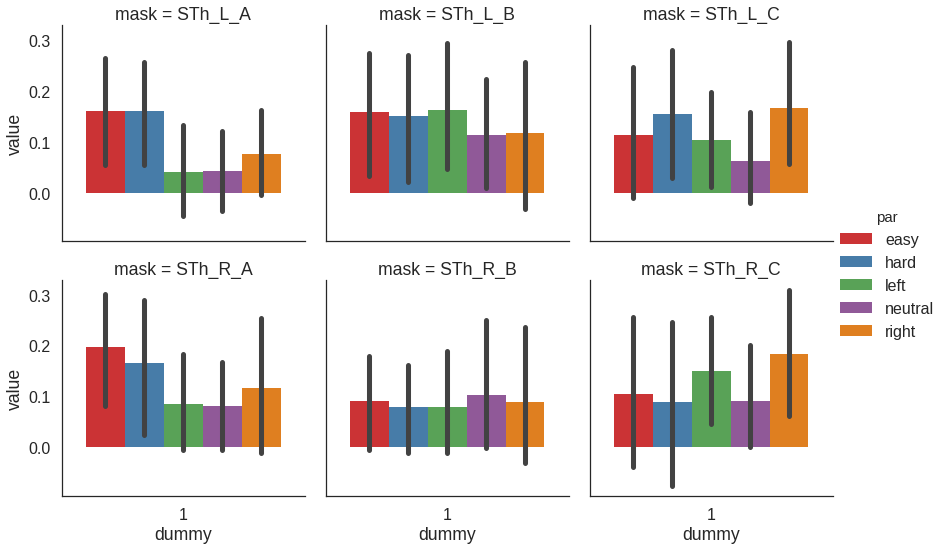

In [34]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
sns.factorplot(x='dummy', y='value', hue='par', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95)

In [35]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    
    print '***** %s ******' % mask
    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$left - df_mask$right)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_rel(df_mask['left'], df_mask['right'])
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                     't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 'p']], 2).T

***** STh_L_A ******
***** STh_L_B ******
***** STh_L_C ******
***** STh_R_A ******
***** STh_R_B ******
***** STh_R_C ******


,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,0.3,0.36,0.5,0.32,0.25,0.28
p,0.49,0.34,0.2,0.42,0.79,0.55


# Model 1c


It is well-known that especially limbic structures show highly heightened activity after an error has been made {Alexander:2011js}. Therefore, “drift-rate”-related activity in limbic areas such as the Insula {Mulder:2014ho, Keuken:2014iz} might just be a result of a larger number of errors in trials with a lower drift rate. To test this hypothesis, we fitted a third variant of the GLM (GLM 1c), that deconfounded the task difficulty from error trials. It included the following regressors: (a) neutral cue, (b) payoff cue, (d) easy RDM stimulus (correct), (e) easy RDM stimulus (error), (f) hard RDM stimulus (correct), (g) hard RDM stimulus (error). The main contrast-of-interest for this GLM was ‘hard RDM stimulus (correct) > easy RDM stimulus (correct)’.


In [36]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model1c', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R_C/all the input arrays must have same number of dimensions


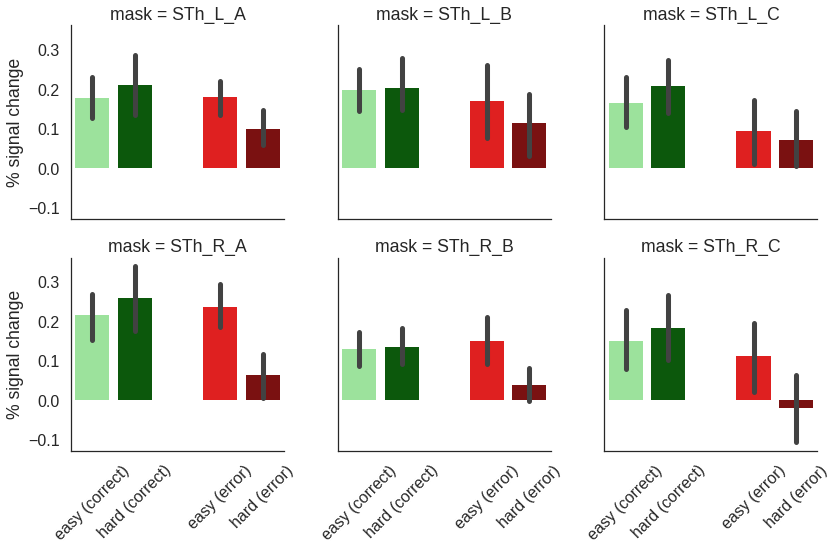

In [37]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
fac = sns.factorplot(x='par', y='% signal change', data=tmp, col='mask', col_wrap=3, kind='bar', ci=67, x_order=['easy (correct)', 'hard (correct)', '', 'easy (error)', 'hard (error)'], palette=['lightgreen', 'darkgreen', 'red', 'red', 'darkred'])

fac.set_xticklabels(rotation=45)
fac.set_xlabels('')

plt.tight_layout()

plt.savefig('/home/gdholla1/projects/bias/reports/figures/glm_model1c.pdf')

In [39]:
import re

In [40]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    df = pandas.melt(df.reset_index(), id_vars='subject_id')
    reg = re.compile('([a-z]+) \(([a-z]+)\)')

    df = df[df.par.apply(lambda x: reg.match(x) is not None)]
    df['difficulty'] = df.par.apply(lambda x: reg.match(x).group(1))
    df['correct'] = df.par.apply(lambda x: reg.match(x).group(2))
    df['subject_id'] = df['subject_id'].astype('category')
    
    
    print ' ****** %s *******' % mask
    %R -i df

    %R library(BayesFactor)
    %R bf = anovaBF(value ~ difficulty*correct + subject_id, data = df,  whichRandom="subject_id", whichModels='top', iterations=100000)
    %R print(bf)
    %R print(1/bf)
    %R print(summary(aov(value ~ difficulty*correct + Error(subject_id/(difficulty*correct)), df)))
    
#     %R tmp = extractBF(bf)
#     %R -o tmp
    
#     results.append({'mask':mask,
#                     'BF':tmp.bf.values[0]})
    
# pandas.DataFrame(results)[['mask', 'BF']]

 ****** STh_L_A *******


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 1.73602  ±2.31%
[2] Omit correct            : 2.184597 ±1.83%
[3] Omit difficulty         : 3.736553 ±1.74%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                         0.5760301
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                    0.4577504
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                 0.2676263



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  2.449  0.1361               

Error: subject_id:difficulty
           Df Sum Sq Mean Sq F value Pr(>F)
difficulty  1 0.0112 0.01115   0.571   0.46
Residuals  18 0.3517 0.01954               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.0558 0.05579   0.755  0.396
Residuals 18 1.3304 0.07391               

Error: subject_id:difficulty:correct
                   Df  Sum Sq Mean Sq F value Pr(>F)  
difficulty:correct  1 0.05733 0.05733   3.548 0.0759 .
Residuals          18 0.29088 0.01616                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


 ****** STh_L_B *******


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 3.399902 ±18.4%
[2] Omit correct            : 2.513587 ±2.07%
[3] Omit difficulty         : 3.78839  ±1.39%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                         0.2941261
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                    0.3978378
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                 0.2639644



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  5.494  0.3052               

Error: subject_id:difficulty
           Df  Sum Sq Mean Sq F value Pr(>F)
difficulty  1 0.01147 0.01147   0.694  0.416
Residuals  18 0.29751 0.01653               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.0664 0.06642   0.578  0.457
Residuals 18 2.0674 0.11486               

Error: subject_id:difficulty:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
difficulty:correct  1 0.0184 0.01842   0.603  0.448
Residuals          18 0.5500 0.03056               


 ****** STh_L_C *******


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 2.586694  ±3.31%
[2] Omit correct            : 0.5138295 ±3.42%
[3] Omit difficulty         : 4.024725  ±3.34%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                         0.3865939
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                     1.946171
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                 0.2484642



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  4.982  0.2768               

Error: subject_id:difficulty
           Df Sum Sq Mean Sq F value Pr(>F)
difficulty  1 0.0019 0.00189   0.046  0.832
Residuals  18 0.7323 0.04069               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)  
correct    1 0.2046 0.20460   4.235 0.0544 .
Residuals 18 0.8696 0.04831                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:difficulty:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
difficulty:correct  1 0.0186 0.01856    0.48  0.497
Residuals          18 0.6960 0.03867               


 ****** STh_R_A *******


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 0.4382096 ±2.99%
[2] Omit correct            : 1.067231  ±5.72%
[3] Omit difficulty         : 1.979137  ±1.66%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                          2.282013
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                    0.9370045
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                 0.5052709



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  3.921  0.2178               

Error: subject_id:difficulty
           Df Sum Sq Mean Sq F value Pr(>F)  
difficulty  1 0.0777 0.07773   3.903 0.0637 .
Residuals  18 0.3585 0.01992                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.1471 0.14713   1.961  0.178
Residuals 18 1.3507 0.07504               

Error: subject_id:difficulty:correct
                   Df Sum Sq Mean Sq F value Pr(>F)  
difficulty:correct  1 0.2247 0.22473   6.344 0.0215 *
Residuals          18 0.6376 0.03542                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


 ****** STh_R_B *******


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 1.503073 ±5.1%
[2] Omit correct            : 2.872619 ±3.68%
[3] Omit difficulty         : 2.197707 ±4.73%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                         0.6653038
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                    0.3481144
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                 0.4550198



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  1.821  0.1012               

Error: subject_id:difficulty
           Df  Sum Sq Mean Sq F value Pr(>F)
difficulty  1 0.05174 0.05174   2.978  0.102
Residuals  18 0.31269 0.01737               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.0278 0.02785   0.436  0.517
Residuals 18 1.1493 0.06385               

Error: subject_id:difficulty:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
difficulty:correct  1 0.0663 0.06631   2.707  0.117
Residuals          18 0.4410 0.02450               


 ****** STh_R_C *******


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 1.338042  ±11.91%
[2] Omit correct            : 0.6730399 ±11.89%
[3] Omit difficulty         : 2.778363  ±11.9%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                         0.7473609
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                     1.485796
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                 0.3599242



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  6.214  0.3452               

Error: subject_id:difficulty
           Df Sum Sq Mean Sq F value Pr(>F)
difficulty  1  0.045 0.04502   0.643  0.433
Residuals  18  1.260 0.06997               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.2817 0.28169   2.935  0.104
Residuals 18 1.7274 0.09597               

Error: subject_id:difficulty:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
difficulty:correct  1 0.1298 0.12983   2.707  0.117
Residuals          18 0.8633 0.04796               


In [41]:
df_glm

df = df_glm.copy()

# df = pandas.melt(df.reset_index(), id_vars='subject_id')
reg = re.compile('([a-z]+) \(([a-z]+)\)')

df = df[df.par.apply(lambda x: reg.match(x) is not None)]
df['difficulty'] = df.par.apply(lambda x: reg.match(x).group(1))
df['correct'] = df.par.apply(lambda x: reg.match(x).group(2))
df['subject_id'] = df['subject_id'].astype('category')

tmp_l = df[np.in1d(df['mask'], ['STh_L_A', 'STh_L_B', 'STh_L_C'])].groupby(['subject_id', 'correct', 'mask'], as_index=False).mean()

%R -i tmp_l
%R library(BayesFactor)
%R bf = anovaBF(value ~ mask*correct + subject_id, data = tmp_l,  whichRandom="subject_id", whichModels='top', iterations=100000)
%R print(bf)
%R print(1/bf)
%R print(summary(aov(value ~ mask*correct + Error(subject_id/(mask*correct)), tmp_l)))

tmp_r = df[np.in1d(df['mask'], ['STh_R_A', 'STh_R_B', 'STh_R_C'])].groupby(['subject_id', 'correct', 'mask'], as_index=False).mean()

%R -i tmp_r
%R library(BayesFactor)
%R bf = anovaBF(value ~ mask*correct + subject_id, data = tmp_r,  whichRandom="subject_id", whichModels='top', iterations=100000)
%R print(bf)
%R print(1/bf)
%R print(summary(aov(value ~ mask*correct + Error(subject_id/(mask*correct)), tmp_r)))

tmp.head()

  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + mask + correct:mask + subject_id , BF is...
[1] Omit correct:mask : 6.278262 ±2.13%
[2] Omit mask         : 9.016157 ±2.07%
[3] Omit correct      : 1.071836 ±2.36%

Against denominator:
  value ~ correct + mask + correct:mask + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                            denominator
numerator                                    correct + mask + subject_id
  correct + mask + correct:mask + subject_id                   0.1592798
                                            denominator
numerator                                    correct + correct:mask + subject_id
  correct + mask + correct:mask + subject_id                            0.110912
                                            denominator
numerator                                    mask + correct:mask + subject_id
  correct + mask + correct:mask + subject_id                        0.9329785



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  4.564  0.2536               

Error: subject_id:mask
          Df Sum Sq Mean Sq F value Pr(>F)
mask       2  0.030 0.01499   0.284  0.754
Residuals 36  1.898 0.05273               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.1492 0.14923   1.544   0.23
Residuals 18 1.7394 0.09663               

Error: subject_id:mask:correct
             Df Sum Sq  Mean Sq F value Pr(>F)
mask:correct  2 0.0142 0.007087   0.647   0.53
Residuals    36 0.3943 0.010953               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + mask + correct:mask + subject_id , BF is...
[1] Omit correct:mask : 5.468601  ±2.45%
[2] Omit mask         : 2.411097  ±2.26%
[3] Omit correct      : 0.7284319 ±2.28%

Against denominator:
  value ~ correct + mask + correct:mask + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                            denominator
numerator                                    correct + mask + subject_id
  correct + mask + correct:mask + subject_id                   0.1828621
                                            denominator
numerator                                    correct + correct:mask + subject_id
  correct + mask + correct:mask + subject_id                            0.414749
                                            denominator
numerator                                    mask + correct:mask + subject_id
  correct + mask + correct:mask + subject_id                         1.372812



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  3.906   0.217               

Error: subject_id:mask
          Df Sum Sq Mean Sq F value Pr(>F)
mask       2 0.1767 0.08836   1.536  0.229
Residuals 36 2.0716 0.05754               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.1948 0.19483   2.023  0.172
Residuals 18 1.7332 0.09629               

Error: subject_id:mask:correct
             Df Sum Sq Mean Sq F value Pr(>F)
mask:correct  2 0.0335 0.01675   1.585  0.219
Residuals    36 0.3805 0.01057               


,subject_id,mask,par,dummy,run,value,% signal change
0,1,STh_L_A,easy (correct),1,2.0,0.021144,0.021144
1,1,STh_L_A,easy (error),1,2.0,-0.095325,-0.095325
2,1,STh_L_A,hard (correct),1,2.0,-0.128460,-0.128460
3,1,STh_L_A,hard (error),1,2.0,-0.007186,-0.007186
4,1,STh_L_A,neutral_cue,1,2.0,0.014610,0.014610


In [42]:
## Interaction

In [44]:
tmp = df_glm.pivot_table(index='subject_id', values='value', columns=['par', 'mask'])
tmp = tmp['easy (correct)'] - tmp['hard (correct)']
tmp = pandas.melt(tmp.reset_index(), id_vars=['subject_id'])
tmp['subject_id'] = tmp.subject_id.astype('category')

tmp_l = tmp[np.in1d(tmp['mask'], ['STh_L_A', 'STh_L_B', 'STh_L_C'])]
%R -i tmp_l
%R bf = anovaBF(value ~ mask + subject_id, data=tmp_l,  whichRandom="subject_id")
# %R bf = anovaBF(value ~ mask , data=tmp_l,  iterations=10000)
%R print(bf)
%R print(summary(aov(value ~ mask + Error(subject_id/(mask)), tmp_l)))

    
tmp_r = tmp[np.in1d(tmp['mask'], ['STh_R_A', 'STh_R_B', 'STh_R_C'])]
%R -i tmp_r
%R bf = anovaBF(value ~ mask + subject_id, data=tmp_r,  whichRandom="subject_id")
# %R bf = anovaBF(value ~ mask , data=tmp_l,  iterations=10000)
%R print(bf)
%R print(summary(aov(value ~ mask + Error(subject_id/(mask)), tmp_r)))

  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.1669845 ±0.72%

Against denominator:
  value ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS




Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18 0.8731 0.04851               

Error: subject_id:mask
          Df Sum Sq  Mean Sq F value Pr(>F)
mask       2 0.0120 0.005999   0.249  0.781
Residuals 36 0.8657 0.024048               


  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.1785562 ±2.65%

Against denominator:
  value ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS




Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18 0.5607 0.03115               

Error: subject_id:mask
          Df Sum Sq  Mean Sq F value Pr(>F)
mask       2 0.0145 0.007244   0.246  0.784
Residuals 36 1.0620 0.029499               


## Model 2

In [635]:


import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model2', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R_C/all the input arrays must have same number of dimensions


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Error: 15/STh_L_A/'error (incongruent)'


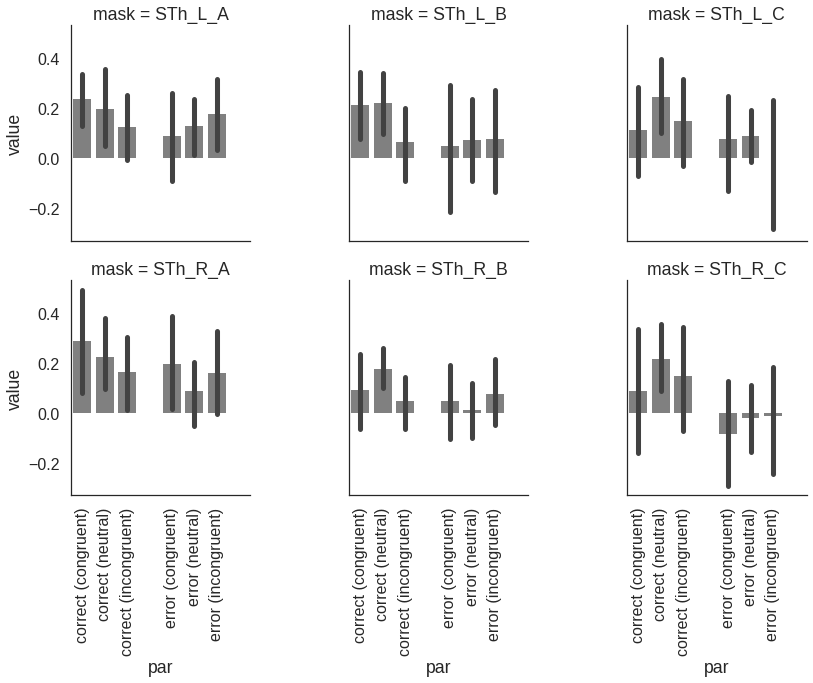

In [636]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
# sns.factorplot(x='dummy', y='value', hue='par', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['correct (congruent)', 'correct (neutral)', 'correct (incongruent)', '', 'error (congruent)', 'error (neutral)', 'error (incongruent)', ''])
fac = sns.factorplot(x='par', y='value', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, x_order=['correct (congruent)', 'correct (neutral)', 'correct (incongruent)', '', 'error (congruent)', 'error (neutral)', 'error (incongruent)', ''], palette=['gray'])
fac.set_xticklabels(rotation=90)



In [637]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    df = pandas.melt(df.reset_index(), id_vars='subject_id')
    reg = re.compile('([a-z]+) \(([a-z]+)\)')

    df = df[df.par.apply(lambda x: reg.match(x) is not None)]
    df['correct'] = df.par.apply(lambda x: reg.match(x).group(1))
    df['congruency'] = df.par.apply(lambda x: reg.match(x).group(2))
    df['subject_id'] = df['subject_id'].astype('category')

    %R -i df

    %R library(BayesFactor)
    %R bf = anovaBF(value ~ congruency*correct + subject_id, data = df,  whichRandom="subject_id", whichModels='top')
    %R print(bf)
    %R print(1/bf)
    %R print(summary(aov(value ~ congruency * correct + Error(subject_id/(congruency * correct)), df)))
    %R tmp = extractBF(bf)
    %R -o tmp
    
#     results.append({'mask':mask,
#                     'BF':tmp.bf.values[0]})
    
# pandas.DataFrame(results)[['mask', 'BF']]

  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 2.703178 ±3.78%
[2] Omit congruency         : 11.85688 ±4.18%
[3] Omit correct            : 2.875714 ±3.39%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.3699349
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                0.08433923
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                    0.3477397



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  3.869  0.2149               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2 0.0028 0.00140   0.017  0.983
Residuals  36 2.9373 0.08159               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.0871 0.08715   0.967  0.339
Residuals 18 1.6224 0.09013               

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2 0.1927 0.09637   1.597  0.216
Residuals          36 2.1718 0.06033               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 3.377529 ±3.49%
[2] Omit congruency         : 6.886877 ±3.19%
[3] Omit correct            : 1.102213 ±2.43%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.2960744
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                 0.1452037
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                    0.9072656



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  10.18  0.5658               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2  0.117 0.05852   0.608   0.55
Residuals  36  3.465 0.09624               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.2811  0.2811   1.851   0.19
Residuals 18 2.7342  0.1519               

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2  0.184 0.09201   2.323  0.112
Residuals          36  1.426 0.03960               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 5.617793 ±3.15%
[2] Omit congruency         : 5.621913 ±2.23%
[3] Omit correct            : 1.084348 ±8.13%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.1780058
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                 0.1778754
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                    0.9222131



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  9.378   0.521               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2  0.187 0.09352   0.586  0.562
Residuals  36  5.746 0.15961               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)  
correct    1 0.3608  0.3608   4.076 0.0586 .
Residuals 18 1.5933  0.0885                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2  0.084 0.04201   0.803  0.456
Residuals          36  1.883 0.05229               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 4.620596 ±2.01%
[2] Omit congruency         : 4.569788 ±6.12%
[3] Omit correct            : 1.714012 ±1.7%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.2164223
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                 0.2188286
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                    0.5834266



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  8.776  0.4875               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2  0.176 0.08808   0.912  0.411
Residuals  36  3.477 0.09660               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.1679 0.16788   1.847  0.191
Residuals 18 1.6359 0.09088               

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2 0.0854 0.04271   1.326  0.278
Residuals          36 1.1595 0.03221               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 1.563733 ±2.67%
[2] Omit congruency         : 9.891026 ±2.6%
[3] Omit correct            : 2.521641 ±26.69%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.6394952
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                 0.1011017
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                    0.3965671



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  4.855  0.2697               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2 0.0216 0.01078   0.171  0.844
Residuals  36 2.2729 0.06314               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.0967 0.09666   2.278  0.149
Residuals 18 0.7637 0.04243               

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)  
congruency:correct  2 0.1781 0.08906   3.396 0.0446 *
Residuals          36 0.9440 0.02622                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 6.140006  ±4.07%
[2] Omit congruency         : 4.726607  ±4.23%
[3] Omit correct            : 0.0225871 ±4.05%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.1628663
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                 0.2115682
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                     44.27305



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18   13.1  0.7278               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2  0.185 0.09226   0.827  0.445
Residuals  36  4.016 0.11156               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value  Pr(>F)   
correct    1  1.010  1.0105   9.975 0.00544 **
Residuals 18  1.823  0.1013                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2 0.0278 0.01388   0.297  0.745
Residuals          36 1.6834 0.04676               


# Model 3

In [6]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model3', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R_C/all the input arrays must have same number of dimensions


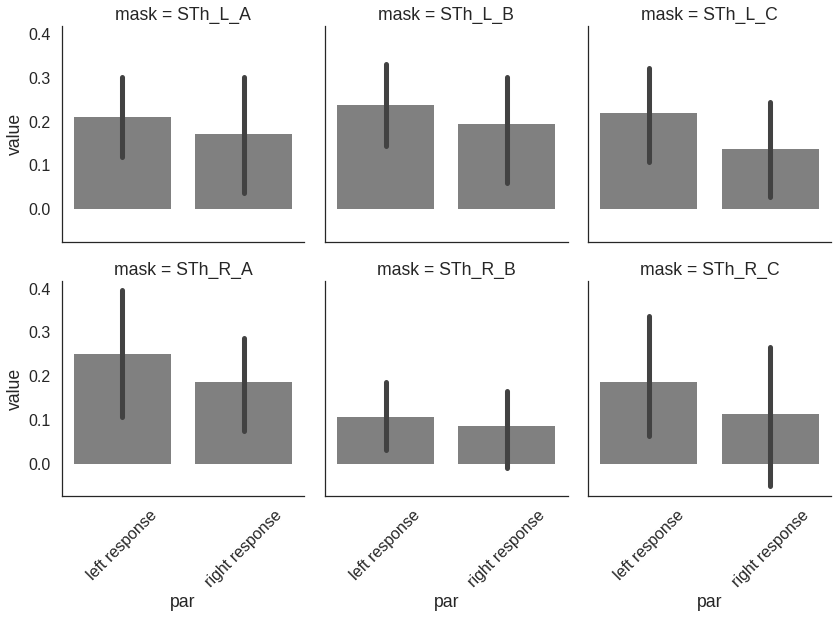

In [7]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
# sns.factorplot(x='dummy', y='value', hue='par', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['correct (congruent)', 'correct (neutral)', 'correct (incongruent)', '', 'error (congruent)', 'error (neutral)', 'error (incongruent)', ''])
fac = sns.factorplot(x='par', y='value', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, x_order=['left response', 'right response'], palette=['gray'])
fac.set_xticklabels(rotation=45)



In [8]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    df = pandas.melt(df.reset_index(), id_vars='subject_id')

    df = df[df.par.apply(lambda x: x.split(' ')[-1] == 'response')]
    
    df_mask = df.pivot_table(index='subject_id', columns='par', values='value')

    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$left.response - df_mask$right.response)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_rel(df_mask['left response'], df_mask['right response'])
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                    't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 't', 'p']], 2).T    
    

/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: coda

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: ************
Welcome to BayesFactor 0.9.11-1. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

  warnings.warn(x, RRuntimeWarning)


,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,0.32,0.3,1.17,0.55,0.28,0.72
t,0.83,0.71,1.97,1.4,0.63,1.62
p,0.42,0.49,0.06,0.18,0.54,0.12


# Model 0

In [10]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    print subject_id
    for run in [1,2,3]:
#         for shift in [-3.0, -1.5, 0.0, 1.5, 3.0]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model0', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
#                 hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'p':r.pvalues[par],
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run,})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

1
2
3
4
5
6
Error: 6/STh_R_C/all the input arrays must have same number of dimensions
7
8
9
10
11
12
13
14
15
16
17
18
19


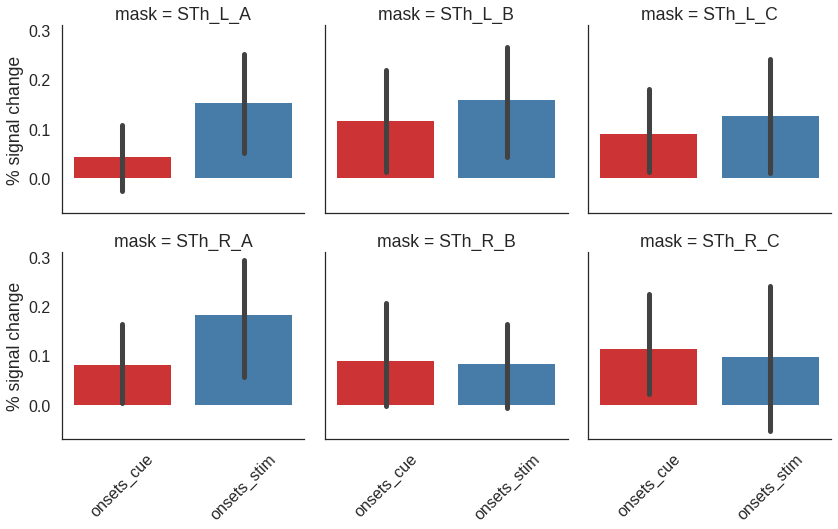

In [16]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
fac = sns.factorplot(x='par', y='% signal change', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95)

fac.set_xticklabels(rotation=45)

plt.tight_layout()

fac.set_xlabels('')

plt.savefig('/home/gdholla1/projects/bias/reports/figures/glm_model0.pdf')

## Stimulus

In [17]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')

    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$onsets_stim)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_1samp(df_mask['onsets_stim'], 0)
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                    't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 't', 'p']], 2).T    
    

,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,6.23,3.45,1.53,6.25,0.99,0.48
t,2.98,2.65,2.15,2.98,1.86,1.28
p,0.01,0.02,0.05,0.01,0.08,0.22


## Cue

In [18]:

masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')

    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$onsets_cue)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_1samp(df_mask['onsets_cue'], 0)
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                    't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 't', 'p']], 2).T    
    

,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,0.44,1.42,1.37,1.07,0.68,1.59
t,1.19,2.1,2.08,1.91,1.58,2.18
p,0.25,0.05,0.05,0.07,0.13,0.04


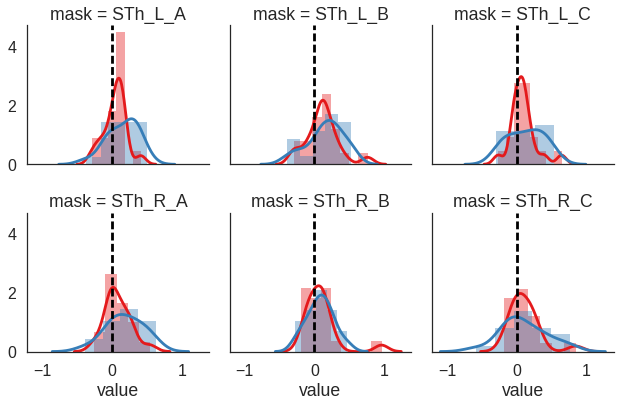

In [19]:
fac = sns.FacetGrid(df_glm.groupby(['subject_id', 'par', 'mask'], as_index=False).mean(), col='mask', col_wrap=3, hue='par')

fac.map(sns.distplot, 'value')
for ax in fac.axes.ravel():
    ax.axvline(0, c='k', ls='--')

In [20]:
tmp = df_glm.pivot_table(index=['mask', 'subject_id'], columns=['par'], values='value').reset_index()
tmp['subject_id'] = tmp['subject_id'].astype('category')

tmp_l = tmp[np.in1d(tmp['mask'], ['STh_L_A', 'STh_L_B', 'STh_L_C'])]
%R -i tmp_l
%R bf = anovaBF(onsets_cue ~ mask + subject_id, data =tmp_l,  whichRandom="subject_id", whichModels='ID', iterations=100000)
%R print(bf)

tmp_l = tmp[np.in1d(tmp['mask'], ['STh_L_A', 'STh_L_B', 'STh_L_C'])]
%R -i tmp_l
%R bf = anovaBF(onsets_stim ~ mask + subject_id, data =tmp_l,  whichRandom="subject_id", iterations=100000)
%R print(bf)

tmp_r = tmp[np.in1d(tmp['mask'], ['STh_R_A', 'STh_R_B', 'STh_R_C'])]
%R -i tmp_r
%R bf = anovaBF(onsets_cue ~ mask + subject_id, data =tmp_r,  whichRandom="subject_id", whichModels='all', iterations=100000)
%R print(bf)

tmp_r = tmp[np.in1d(tmp['mask'], ['STh_R_A', 'STh_R_B', 'STh_R_C'])]
%R -i tmp_r
%R bf = anovaBF(onsets_stim ~ mask + subject_id, data =tmp_r,  whichRandom="subject_id", whichModels='all', iterations=100000)
%R print(bf)

/usr/local/lib/python2.7/dist-packages/rpy2/robjects/pandas2ri.py:57: UserWarning: Error while trying to convert the column "subject_id". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.4398343 ±0.32%

Against denominator:
  onsets_cue ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.1628657 ±0.58%

Against denominator:
  onsets_stim ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.1941809 ±0.37%

Against denominator:
  onsets_cue ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.5141639 ±0.28%

Against denominator:
  onsets_stim ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



In [554]:
tmp_l = tmp_l.pivot_table(index='subject_id')

%R -i tmp_l
%R bf = ttestBF(tmp_l$onsets_cue)
%R print(bf)
%R bf = ttestBF(tmp_l$onsets_stim)
%R print(bf)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 1.144898 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 712.9012 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



In [555]:
tmp_r = tmp_r.pivot_table(index='subject_id')

%R -i tmp_r
%R bf = ttestBF(tmp_r$onsets_cue)
%R print(bf)
%R bf = ttestBF(tmp_r$onsets_stim)
%R print(bf)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.4092498 ±0.01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 262.0966 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



# Model 5

In [48]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    print subject_id
    for run in [1,2,3]:
#         for shift in [-3.0, -1.5, 0.0, 1.5, 3.0]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model5', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
#                 hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'p':r.pvalues[par],
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run,})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

1
2
3
4
5
6
Error: 6/STh_R_C/all the input arrays must have same number of dimensions
7
8
9
10
11
12
13
14
15
16
17
18
19


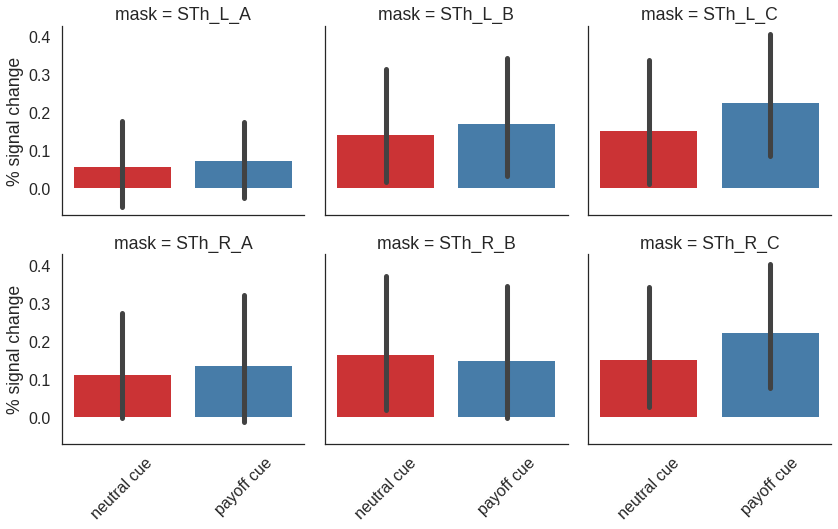

In [50]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
fac = sns.factorplot(x='par', y='% signal change', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95)

fac.set_xticklabels(rotation=45)

plt.tight_layout()

fac.set_xlabels('')

plt.savefig('/home/gdholla1/projects/bias/reports/figures/glm_model5.pdf')

# Model 6

In [51]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    print subject_id
    for run in [1,2,3]:
#         for shift in [-3.0, -1.5, 0.0, 1.5, 3.0]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model6', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
#                 hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'p':r.pvalues[par],
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run,})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

1
2
3
4
5
6
Error: 6/STh_R_C/all the input arrays must have same number of dimensions
7
8
9
10
11
12
13
14
15
16
17
18
19


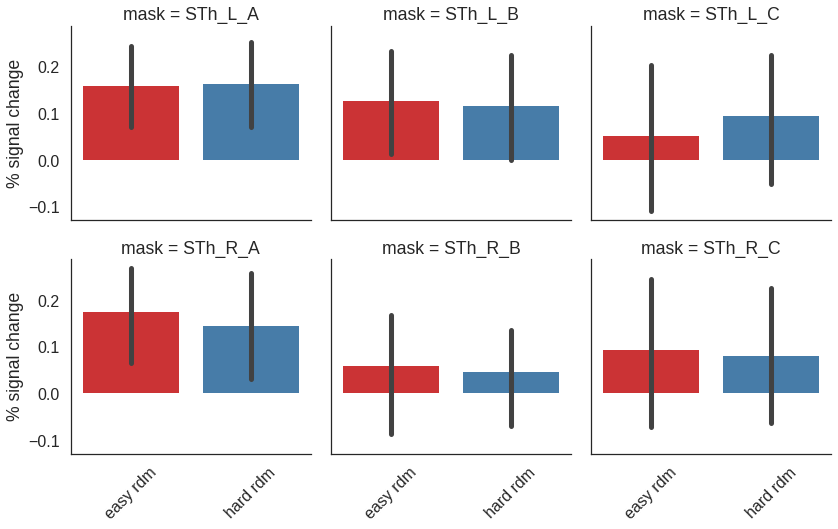

In [53]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
fac = sns.factorplot(x='par', y='% signal change', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95)

fac.set_xticklabels(rotation=45)

plt.tight_layout()

fac.set_xlabels('')

plt.savefig('/home/gdholla1/projects/bias/reports/figures/glm_model6.pdf')